# Chaotic balls
Idea taken from from one of Matt Henderson's [Numberphile videos](https://www.youtube.com/watch?v=6z4qRhpBIyA)

In [77]:
import numpy as np

def R(x: np.array) -> np.array:
    factor = 1. / (x[0]**2 + x[1]**2)
    matrix = np.array([[x[1]**2 - x[0]**2, -2 * x[0] * x[1]], [-2 * x[0] * x[1], x[0]**2 - x[1]**2]])
    return factor * matrix

In [78]:
from sympy.solvers import solve
from sympy import Symbol

def hit_time(x, v):
    # Set variable to solve for, only for real-valued solutions 
    t = Symbol('t', real=True)

    # Solve equation, should have two real-valued solutions
    solutions = np.array(solve((x[0] + v[0]*t)**2 + (x[1] + v[1] * t - 0.5 * 9.81 * t**2)**2 - 1))

    # Return only the positive solution
    return solutions[solutions > 0][0]

In [87]:
def simulate_ball(x, v, dt, T):
    t = 0.
    total_steps = int(T / dt)
    positions = np.zeros((total_steps, 2))

    j = 0
    while j < total_steps:
        t_hit = hit_time(x, v)

        # Simulate trajectory until ball hits circle
        i = 0
        while i * dt < t_hit and (j + i) < total_steps:
            # Update position
            new_pos = np.array([x[0] + v[0] * dt * i, x[1] + v[1] * dt * i - 0.5 * 9.81 * (dt * i)**2])
            positions[j + i] = new_pos

            i += 1

        # Update vertical velocity
        v[1] = v[1] - 9.81 * t_hit
        x = positions[j + i - 1]

        # Reflect ball at circle by multiplying velocity vector with reflection matrix
        v = R(x) @ v
        t += t_hit
        j += i

    return positions


In [176]:
N = 3
T = 60
# Frames per second
fps = 60
# Simulations per second
sps = 6000
# Simulations per frame
spf = int(sps / fps)

total_frames = fps * T
dt = 1. / sps

start_x = np.zeros((N, 2))
start_v = np.zeros((N, 2))

start_x[0, 0] = 0.0001
start_x[1, 0] = 0.0002
start_x[2, 0] = -0.0001

trajectories = []

for i in range(N):
    trajectory = simulate_ball(start_x[i], start_v[i], dt, T)
    trajectories.append(trajectory)

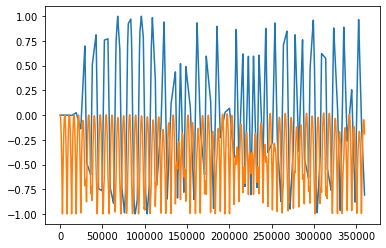

In [177]:
import matplotlib.pyplot as plt

plt.plot(trajectory)

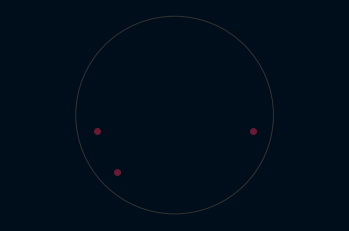

In [178]:
from matplotlib import animation

fig, ax = plt.subplots(facecolor=(0.0, 0.05, 0.1))
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.axis('off')
ax.axis('equal')

circle = plt.Circle((0, 0), radius=1, fill=False, color=(0.2, 0.2, 0.2))
ax.add_patch(circle)

balls = [plt.plot([], [], marker='o', linewidth=1, color=(0.4, 0.1, 0.2))[0] for _ in range(N)]

def update_plot(i):
    for j in range(N):
        balls[j].set_data(trajectories[j][i*spf][0], trajectories[j][i*spf][1])
    return balls

anim_writer = animation.FFMpegWriter(fps=fps)
plt.ioff()
anim = animation.FuncAnimation(fig, update_plot, frames=range(total_frames))
anim.save('chaotic_balls.mp4', dpi=600, writer=anim_writer)